In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv('Housing.csv')
print(df.head())
print(df.info())
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [9]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})


In [10]:
df = df.dropna()


In [17]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad']]
y = df['price']


In [23]:
print(X.isnull().sum())
print(X.dtypes)
print(y.isnull().sum())


area         0
bedrooms     0
bathrooms    0
stories      0
mainroad     0
dtype: int64
area         int64
bedrooms     int64
bathrooms    int64
stories      int64
mainroad     int64
dtype: object
0


In [24]:
X = X.dropna()
y = y[X.index]  # keep target aligned


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1150176.4237187058
Mean Squared Error (MSE): 2383364126448.7256
Root Mean Squared Error (RMSE): 1543814.7966801994
R² Score: 0.5284734388318755


In [28]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

     Feature   Coefficient
0       area  3.140046e+02
1   bedrooms  2.063005e+05
2  bathrooms  1.269032e+06
3    stories  4.414603e+05
4   mainroad  7.374018e+05


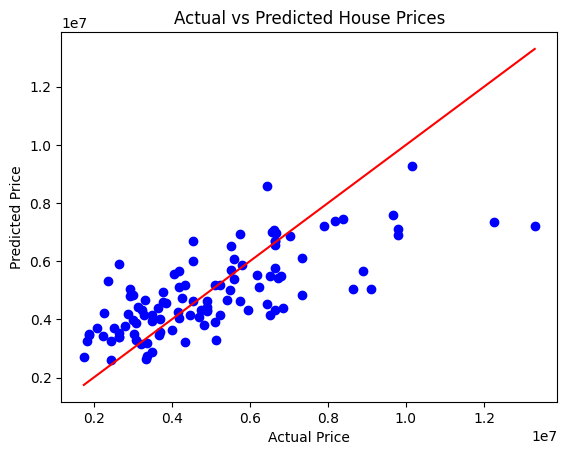

In [29]:
# Plot fof actual vs predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # ideal line
plt.show()

